<a href="https://colab.research.google.com/github/qg2203/Text_Analysis_Final_Project/blob/main/Qing_GUO_Text_Analysis_in_Python_Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploring the Relationship between Company’ ESG and Innovation Performance**

## I. Introduction:

The global business landscape is witnessing a significant shift towards Environmental, Social, and Governance (ESG) considerations, reflecting a growing awareness of sustainability and responsible business practices. Innovations that prioritize ESG criteria are more likely to benefit society and the environment while creating companies' long-term value. This research project aims to explore the relationship between a company's ESG performance and its innovation capabilities. By examining how companies communicate and implement ESG principles in their innovation efforts, this research can contribute to a better understanding of the dynamics between sustainability and innovation. Furthermore, this project will contribute to a better understanding of how ESG practices influence innovation and vice versa, as it holds implications for sustainable business practices, corporate growth, and public policy.

## II. Hypothesis:

In this research, I hypothesize companies frequently mention both ESG factors and innovation in their public documents, indicating a recognized and emphasized connection between sustainable practices and innovative strategies. It implies that companies acknowledge and highlight the interplay between their commitment to sustainable practices and their pursuit of innovative initiatives. I also anticipate that there is a positive relationship between a company's strong ESG performance and its innovation efforts.

## III. Methodology:

### A. Data Collection and Preparation:

  - Company Selection (4 Companies): A diverse set of 4 companies will be selected, acknowledging the potential for bias. I will consider factors such as industry diversity, market capitalization, and geographic location to ensure a broad representation.

  - Web Scraping to convert PDF to Text Analysis: Official company reports regarding ESG and innovation in PDF format will be scraped and converted into text files. This text data will be used for in-depth text mining and analysis.

### B. Text Analysis & Data Visualization:

  - Term Frequency Analysis:  I will adopt Term Frequency Analysis to determine the frequency of references to ESG and innovation in the text data. This analysis will help us identify the prominence of these terms in company documents.

  - Contextual Analysis: To gain a deeper understanding of how ESG and innovation are mentioned, I will leverage Natural Language Processing (NLP) tools, such as NLTK, to analyze the context in which these terms appear in the text. This will involve examining sentences, paragraphs, and surrounding language for nuanced insights.

  - Data Visualization: Data visualization(e.g Word clouds and bar charts) will be adopted in cases such as conducting term frequency analysis on references to ESG and innovation to further illustrate the relationships between these performances.

### C.Expected Outcomes
  - This project aims to yield the following outcomes:
  - Insights into how companies communicate this relationship in their public documents and press releases. A basic understanding of the relationship between a company's ESG performance and its innovation performance.


## IV. Text Anaylsis & Data Visualization:



### Report 1: McKinsey 2022 ESG Full Report

#### Extracting text from PDF file:

Here I ask ChatGPT 'How to conduct text analysis on a PDF file'.


In [ ]:
!pip install PyPDF2
from PyPDF2 import PdfReader
def pdf_to_text(pdf_path):
    with open(pdf_path, "rb") as file:
        reader = PdfReader(file)
        text = ""
        for page_num in range(len(reader.pages)):
            page = reader.pages[page_num]
            text += page.extract_text()
    return text
pdf_path = "/content/McKinsey_2022_ESG_Full_Report.pdf"

extracted_text_Mckinsey = pdf_to_text(pdf_path)
print(extracted_text_Mckinsey)

### Data Cleaning

Then I am preparing the text for analysis by tokenizing, converting to lowercase, removing stopwords, and lemmatizing. The cleaned text is then stored in a file for further use. [Krisel,2023](https://github.com/rskrisel/intro_to_nltk/blob/main/Intro_NLTK_workshop.ipynb)

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

# Download necessary NLTK resources
nltk.download(['stopwords', 'punkt', 'wordnet'])

# Define stopwords and lemmatizer
stops = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    """
    Clean and lemmatize text.
    Converts words to lower case, removes stopwords and digits,
    and maps related terms to a unified representative term.
    """
    text_tokens = word_tokenize(text)
    text_lower = [t.lower() for t in text_tokens if t.isalnum() and not t.isdigit()]
    text_stops = [t for t in text_lower if t not in stops]

    unified_terms = {
        'sustainability': 'sustainability',
        'sustainable': 'sustainability',
        'innovation': 'innovation',
        'innovative': 'innovation',
        'innovate': 'innovation'
    }


    text_clean = [unified_terms.get(lemmatizer.lemmatize(t), t) for t in text_stops]
    return text_clean

cleaned_text_Mckinsey = clean_text(extracted_text_Mckinsey)

# Store the cleaned text in a file
with open("cleaned_text_Mckinsey.txt", "w", encoding='utf-8') as file:
    file.write(" ".join(cleaned_text_Mckinsey))  # Join the cleaned text into a single string for writing to the file


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Term Frequency Analysis & Data Visualization

Here I used Term Frequency Method to display the top 10 most common words

In [ ]:
from nltk import FreqDist

my_dist = FreqDist(cleaned_text_Mckinsey)

# Display the most common words and their frequencies
print("Top 10 Most Common Words:")
print(my_dist.most_common(10))

Top 10 Most Common Words:
[('sustainability', 275), ('growth', 208), ('mckinsey', 203), ('inclusive', 199), ('colleagues', 190), ('responsible', 178), ('approach', 163), ('reporting', 162), ('firm', 158), ('esg', 154)]


Then I use matplotlib to generate a horizontal bar chart that visualizes the frequency distribution of the top 20 words with the aim to gain insights into the most prevalent words in our cleaned_text document.

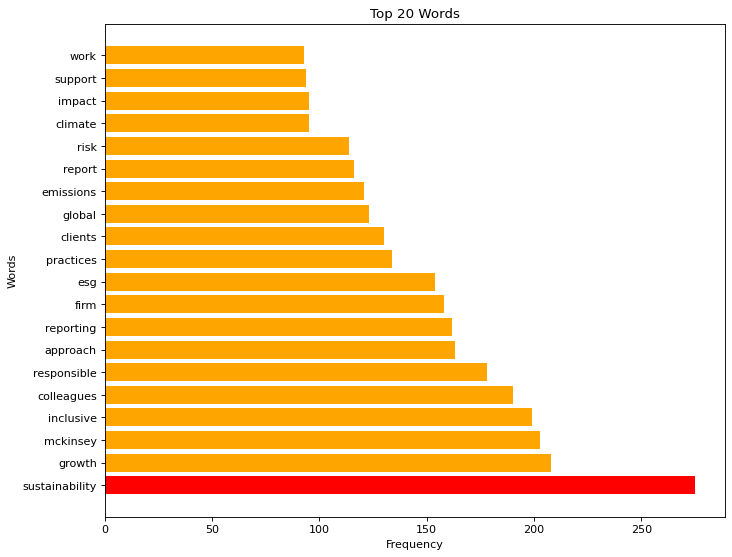

In [ ]:
import nltk
from nltk import FreqDist
import numpy as np
import matplotlib.pyplot as plt

my_dist = FreqDist(cleaned_text_Mckinsey)

# Get the top 20 words and their frequencies
top_words = [word[0] for word in my_dist.most_common(20)]
word_frequencies = [word[1] for word in my_dist.most_common(20)]

# Plot the bar chart
plt.figure(figsize=(10, 8), dpi=80)
colors = ['red' if word == 'sustainability' else 'orange' for word in top_words]
plt.barh(top_words, word_frequencies, color=colors)
plt.title('Top 20 Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

I noticed there are some words that do not hold analytical values, so I exluded some words that are irrelevent to our analysis.

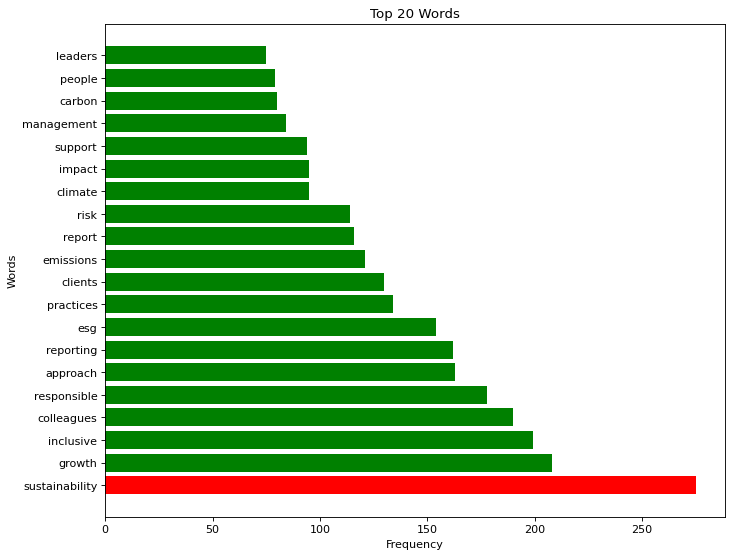

In [ ]:
import nltk
from nltk import FreqDist
import numpy as np
import matplotlib.pyplot as plt

my_dist = FreqDist(cleaned_text_Mckinsey)
exclude_words = ['client', 'colleague','mckinsey','firm','work','program','team','new','global']
filtered_dist = {word: freq for word, freq in my_dist.items() if word not in exclude_words}

# Get the top 20 words and their frequencies
top_words = [word[0] for word in FreqDist(filtered_dist).most_common(20)]
word_frequencies = [word[1] for word in FreqDist(filtered_dist).most_common(20)]

# Plot the bar chart
plt.figure(figsize=(10, 8), dpi=80)
colors=['red' if word == 'sustainability' else 'green' for word in top_words]
plt.barh(top_words, word_frequencies, color=colors)
plt.title('Top 20 Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

As we can see from the above that innovation is not part of the most common 20 words, so I am using FreqDist function to understand the frequency of the word 'innovation'

In [ ]:
from nltk import FreqDist

my_dist = FreqDist(cleaned_text_Mckinsey)

# Get the frequencies of the target words
word_frequencies_innovation = my_dist['innovation']
word_frequencies_sustainability = my_dist['sustainability']

print("Term frequency of 'innovation':", word_frequencies_innovation)
print("Term frequency of ' sustainability':", word_frequencies_sustainability)


Term frequency of 'innovation': 27
Term frequency of ' sustainability': 275


Here I generate a bar chart visualizing the term frequencies of 'sustainability' and 'innovation' using Seaborn, providing a quick visual comparison of the frequencies of these terms.

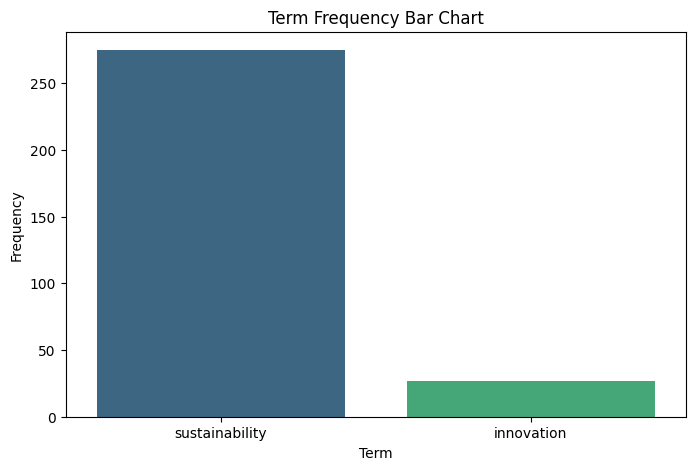

In [ ]:
import pandas as pd
import seaborn as sns

# Create a DataFrame for term frequency
term_freq_df = pd.DataFrame({'Term': ['sustainability', 'innovation'],
                             'Frequency': [275, 27]})

# Create a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Term', y='Frequency', data=term_freq_df, palette='viridis')
plt.title('Term Frequency Bar Chart')
plt.show()

### Corcordance Analysis

Then I used the concordance method to understand how "sustainability" and "innovation" are used in the cleaned_text by displaying the surrounding words. [Krisel,2023](https://github.com/rskrisel/intro_to_nltk/blob/main/Intro_NLTK_workshop.ipynb)

In [ ]:
import nltk
from nltk import Text

text_object = Text(cleaned_text_Mckinsey)

# Find the concordance of 'sustainability'
print("Concordance for 'sustainability':")
text_object.concordance("sustainability",width=100,lines=20)

# Find the concordance of 'innovation'
print("\nConcordance for 'innovation':")
text_object.concordance("innovation",width=100,lines=20)


Concordance for 'sustainability':
Displaying 20 of 275 matches:
esg report creating sustainability inclusive growing future portia dlamini so
illed workforces around world introduction sustainability inclusive grow th responsible practices re
hlights response war ukrainesustainability sustainability glance clients approach insights key publi
assurance statement esg reportintroduction sustainability inclusive growth responsible practices rep
ssage global managing partner accelerating sustainability inclusive growth world bob center speaking
ver committed firm aspiration accelerating sustainability inclusive growth world done analysis asses
talyzing decarbonization colleagues worked sustainability engagements clients across nearly countrie
ro bono engagements esg reportintroduction sustainability inclusive growth responsible practices rep
 enduring change world aspire accelerating sustainability inclusive growth direct measurable impact 
hlights esg r eport esg reportintroduction sustain

Based on the above outcome, we can see that the coexistence of sustainability and innovation in various contexts implies an integrated approach, where innovation is seen as a driver for achieving sustainability goals, more specifically:

For Sustainability:
The term 'sustainability' appears frequently in various contexts, such as discussions about responsible practices, engagement with clients on sustainability, and the pursuit of inclusive and environmentally conscious growth.
References to decarbonization, climate reports, and leading sustainability ratings indicate a focus on environmental responsibility.
Commitment to environmental sustainability, inclusive economic growth, and contributions to the ESG suggest a comprehensive approach to sustainability.

For Innovation:
The term 'innovation' is mentioned in the context of driving economic growth, catalyzing decarbonization, and reaching net zero.
There is a focus on digital capability centers, advanced innovation learning hubs, and the importance of responsible innovation management.
Collaboration, learning, and research are mentioned in the context of innovation labs, indicating a commitment to exploring new ideas and approaches.

Relationship Between Sustainability and Innovation:
Both terms are used in the context of driving growth and pursuing goals related to environmental responsibility.
There is an emphasis on responsible innovation, suggesting a commitment to ensuring that innovative practices align with sustainable and ethical considerations.


In summary, the concordance results suggest a strong relationship between sustainability and innovation in the analyzed text. The organization appears to view innovation as a means to drive sustainable practices and achieve environmental and economic goals. The emphasis on responsible and inclusive approaches indicates a holistic perspective that combines both sustainability and innovation.

### Similar Word Analysis

Then let's now see which words appear in similar contexts as the word "sustainability" and 'innovation'.  [Krisel,2023](https://github.com/rskrisel/intro_to_nltk/blob/main/Intro_NLTK_workshop.ipynb)

In [ ]:
text_object.similar('sustainability')

inclusive statement climate work countries launched served achieve
digital houston collected complex security glam


In [ ]:
text_object.similar('innovation')

needed


We can see that 'Sustainability' in this context is associated with tangible aspects like inclusivity, climate action, and achieving goals in various countries. It relates to concrete efforts and measurable outcomes.

On the other hand, 'Innovation' appears to be more aspirational and is viewed as a necessary element for progress. While 'sustainability' focuses on the practical application and achievement of specific objectives, 'innovation' is about the aspiration and drive needed to bring about change and advance these goals.

### TF-IDF Anaylsis
Here I use TF-IDF to find out the top 10 words with the highest tf–idf for the text, but unfortunately I could not find relationship between 'sustainability' and 'innovation.  [Krisel,2023](https://github.com/rskrisel/tf-idf/blob/main/README.md)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have a list of cleaned texts

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the cleaned texts
tfidf_matrix = vectorizer.fit_transform(cleaned_text_Mckinsey)

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Calculate the average TF-IDF score for each word across all texts
average_tfidf_scores = tfidf_matrix.mean(axis=0).A1

# Create a dictionary mapping words to their average TF-IDF scores
word_tfidf_dict = dict(zip(feature_names, average_tfidf_scores))

# Sort the dictionary by TF-IDF scores
sorted_word_tfidf = sorted(word_tfidf_dict.items(), key=lambda x: x[1], reverse=True)

# Print the most distinctive words
print("Most distinctive words:")
for word, tfidf_score in sorted_word_tfidf[:5]:
    print(f"{word}: {tfidf_score}")

Most distinctive words:
sustainability: 0.01296252651425885
growth: 0.009804383690784867
mckinsey: 0.009568701390525614
inclusive: 0.009380155550318212
colleagues: 0.008955927409851558




### Report 2: Google 2023 Environmental Report

#### Extracting text from PDF file:

Here I ask ChatGPT 'How to conduct text analysis on a PDF file'.


In [ ]:
!pip install PyPDF2
from PyPDF2 import PdfReader
def pdf_to_text(pdf_path):
    with open(pdf_path, "rb") as file:
        reader = PdfReader(file)
        text = ""
        for page_num in range(len(reader.pages)):
            page = reader.pages[page_num]
            text += page.extract_text()
    return text
pdf_path = "/content/google-2023-environmental-report.pdf"

# 调用函数
extracted_text_google = pdf_to_text(pdf_path)
print(extracted_text_google)

### Text Cleaning

Then I am preparing the text for analysis by tokenizing, converting to lowercase, removing stopwords, and lemmatizing. The cleaned text is then stored in a file for further use. [Krisel,2023](https://github.com/rskrisel/intro_to_nltk/blob/main/Intro_NLTK_workshop.ipynb)

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

# Download necessary NLTK resources
nltk.download(['stopwords', 'punkt', 'wordnet'])

# Define stopwords and lemmatizer
stops = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    """
    Clean and lemmatize text.
    Converts words to lower case, removes stopwords and digits,
    and maps related terms to a unified representative term.
    """
    text_tokens = word_tokenize(text)
    text_lower = [t.lower() for t in text_tokens if t.isalnum() and not t.isdigit()]
    text_stops = [t for t in text_lower if t not in stops]

    unified_terms = {
        'sustainability': 'sustainability',
        'sustainable': 'sustainability',
        'innovation': 'innovation',
        'innovative': 'innovation',
        'innovate': 'innovation'
    }

    # Lemmatize without considering the part of speech
    text_clean = [unified_terms.get(lemmatizer.lemmatize(t), t) for t in text_stops]
    return text_clean

cleaned_text_google = clean_text(extracted_text_google)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Term Frequency Analysis & Visualization

Here I used Term Frequency Method to display the top 10 most common words, then I use matplotlib to generate a horizontal bar chart that visualizes the frequency distribution of the top 20 words with the aim to gain insights into the most prevalent words in our cleaned_text document.

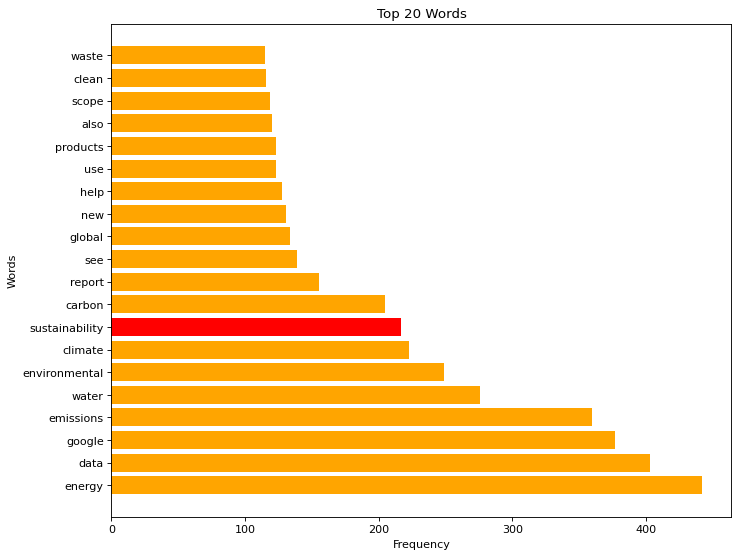

In [ ]:
import nltk
from nltk import FreqDist
import numpy as np
import matplotlib.pyplot as plt

my_dist = FreqDist(cleaned_text_google)

# Get the top 20 words and their frequencies
top_words = [word[0] for word in my_dist.most_common(20)]
word_frequencies = [word[1] for word in my_dist.most_common(20)]

# Plot the bar chart
plt.figure(figsize=(10, 8), dpi=80)
colors = ['red' if word == 'sustainability' else 'orange' for word in top_words]
plt.barh(top_words, word_frequencies, color=colors)
plt.title('Top 20 Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

I noticed there are some words that do not hold analytical values, so I exluded some words that are irrelevent to our analysis.

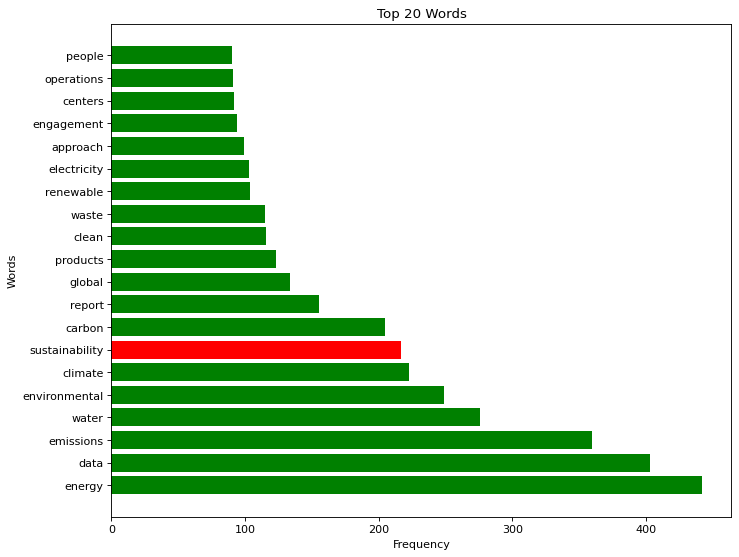

In [ ]:
import nltk
from nltk import FreqDist
import numpy as np
import matplotlib.pyplot as plt

my_dist = FreqDist(cleaned_text_google)
exclude_words = ['see','new','help','use','also','scope','work','change','center','google','across']
filtered_dist = {word: freq for word, freq in my_dist.items() if word not in exclude_words}

# Get the top 20 words and their frequencies
top_words = [word[0] for word in FreqDist(filtered_dist).most_common(20)]
word_frequencies = [word[1] for word in FreqDist(filtered_dist).most_common(20)]

# Plot the bar chart
plt.figure(figsize=(10, 8), dpi=80)
colors=['red' if word == 'sustainability' else 'green' for word in top_words]
plt.barh(top_words, word_frequencies, color=colors)
plt.title('Top 20 Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

As we can see from the above that innovation is not part of the most common 20 words, so I am using FreqDist function to understand the frequency of the word 'innovation'

In [ ]:
from nltk import FreqDist

my_dist = FreqDist(cleaned_text_google)


# Get the frequencies of the target words
word_frequencies_innovation = my_dist['innovation']
word_frequencies_sustainability = my_dist['sustainability']

print("Term frequency of 'innovation':", word_frequencies_innovation)
print("Term frequency of ' sustainability':", word_frequencies_sustainability)



Term frequency of 'innovation': 48
Term frequency of ' sustainability': 217


Here I generate a bar chart visualizing the term frequencies of 'sustainability' and 'innovation' using Seaborn, providing a quick visual comparison of the frequencies of these terms.

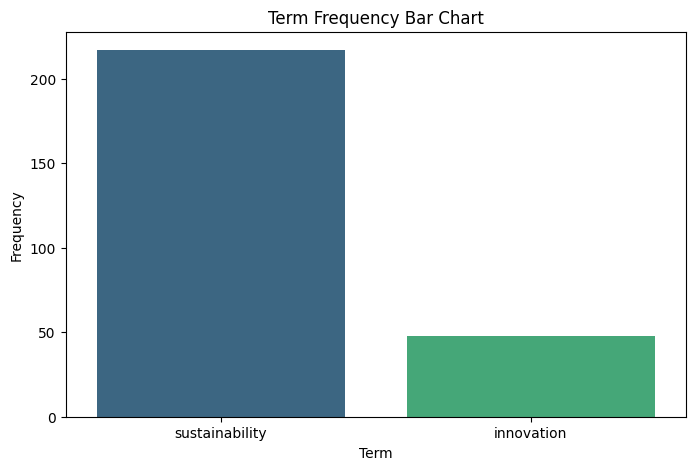

In [ ]:
import pandas as pd
import seaborn as sns

# Create a DataFrame for term frequency
term_freq_df = pd.DataFrame({'Term': ['sustainability', 'innovation'],
                             'Frequency': [217, 48]})

# Create a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Term', y='Frequency', data=term_freq_df, palette='viridis')
plt.title('Term Frequency Bar Chart')
plt.show()

### Corcordance Analysis

Then I used the concordance method to understand how "sustainability" and "innovation" are used in the cleaned_text by displaying the surrounding words. [Krisel,2023](https://github.com/rskrisel/intro_to_nltk/blob/main/Intro_NLTK_workshop.ipynb)

In [ ]:
import nltk
from nltk import Text

text_object_google = Text(cleaned_text_google)

# Find the concordance of 'sustainability'
print("Concordance for 'sustainability':")
text_object_google.concordance("sustainability",width=90,lines=15)

# Find the concordance of 'innovation'
print("\nConcordance for 'innovation':")
text_object_google.concordance("innovation",width=90,lines=15)


Concordance for 'sustainability':
Displaying 25 of 217 matches:
eport provides overview environmental sustainability strategy targets annual progress towa
nvironmental report executive summary sustainability reports sustainability blog commitmen
cutive summary sustainability reports sustainability blog commitments alphabet environment
oduction executive letters highlights sustainability strategy targets progress summary eme
ition appro ach help ing peo ple make sustainability choices reducing home energy use prov
es reducing home energy use providing sustainability transpo rtation options sharin g acti
ature biodiversity spotlight building sustainability camp us mountain view73 governance en
ductionexecutive letters svp learning sustainability chief sustainability officer highligh
ers svp learning sustainability chief sustainability officer highlights sustainability str
ief sustainability officer highlights sustainability strategytargets progress summaryemerg
ress summaryemerging oppor

Sustainability:
The text mentions an "environmental sustainability strategy" and progress reports towards sustainability goals.
There is a focus on Google's commitment to sustainability, including reports, blogs, and executive letters highlighting sustainability strategies.
The concordance indicates a connection between sustainability and various initiatives, such as artificial intelligence (AI) for sustainability and gigaton aspirations.
Sustainability efforts include reducing emissions, achieving sustainability goals, and integrating sustainability into business practices.

Innovation:
The text discusses Google's investment in breakthrough innovation and creating an ecosystem of collaboration.
There is an emphasis on technology innovation and its role in addressing societal challenges.
Information innovation is highlighted, and there's a mention of Google's role in pushing the frontier of innovation.
The concordance suggests that innovation plays a key role in creating a better future and addressing global challenges.
Relationship Between Sustainability and
Innovation:
Both terms appear in the context of Google's efforts, indicating a connection between sustainability and innovation in the company's initiatives.
The concordance suggests that innovation is a crucial component in achieving sustainability goals, with mentions of breakthroughs, technology, and collaborative ecosystems.

In summary, the concordance implies that sustainability and innovation are closely linked in the discussed context, with innovation playing a significant role in advancing sustainability goals and addressing environmental challenges. The relationship seems to revolve around using innovative approaches and technologies to achieve sustainability objectives.

### Similar Word Analysis

Then let's now see which words appear in similar contexts as the word "sustainability" and 'innovation'. But in this context, since there is no similar word to 'innovation', I could not reach any conclusion.   [Krisel,2023](https://github.com/rskrisel/intro_to_nltk/blob/main/Intro_NLTK_workshop.ipynb)

In [ ]:
text_object_google.similar('sustainability')

water global circular public partnerships climate change carbon making
better informed clean accelerate platform solar save risks analyze add
architecture


In [ ]:
text_object_google.similar('innovation')

### TF-IDF Anaylsis
Here I use TF-IDF to find out the top 10 words with the highest tf–idf for the text, but unfortunately I could not find relationship between 'sustainability' and 'innovation.  [Krisel,2023](https://github.com/rskrisel/tf-idf/blob/main/README.md)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the cleaned texts
tfidf_matrix = vectorizer.fit_transform(text_object_google)

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Calculate the average TF-IDF score for each word across all texts
average_tfidf_scores = tfidf_matrix.mean(axis=0).A1

# Create a dictionary mapping words to their average TF-IDF scores
word_tfidf_dict = dict(zip(feature_names, average_tfidf_scores))

# Sort the dictionary by TF-IDF scores
sorted_word_tfidf = sorted(word_tfidf_dict.items(), key=lambda x: x[1], reverse=True)

# Print the most distinctive words
print("Most distinctive words:")
for word, tfidf_score in sorted_word_tfidf[:5]:
    print(f"{word}: {tfidf_score}")

Most distinctive words:
energy: 0.01448990296354567
data: 0.013211382113821056
google: 0.012359034880671313
emissions: 0.011801730920534943
water: 0.009047993705743468




### Report 3: 2022 Microsoft Environmental Sustainability Report

#### Extracting text from PDF file:

Here I ask ChatGPT 'How to conduct text analysis on a PDF file'.


In [ ]:
!pip install PyPDF2
from PyPDF2 import PdfReader
def pdf_to_text(pdf_path):
    with open(pdf_path, "rb") as file:
        reader = PdfReader(file)
        text = ""
        for page_num in range(len(reader.pages)):
            page = reader.pages[page_num]
            text += page.extract_text()
    return text
pdf_path = "/content/2022 Microsoft Environmental Sustainability Report.pdf"


extracted_text_Microsoft = pdf_to_text(pdf_path)
print(extracted_text_Microsoft)

### Text Cleaning

Then I am preparing the text for analysis by tokenizing, converting to lowercase, removing stopwords, and lemmatizing. The cleaned text is then stored in a file for further use. [Krisel,2023](https://github.com/rskrisel/intro_to_nltk/blob/main/Intro_NLTK_workshop.ipynb)

In [ ]:

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

# Download necessary NLTK resources
nltk.download(['stopwords', 'punkt', 'wordnet'])

# Define stopwords and lemmatizer
stops = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    """
    Clean and lemmatize text.
    Converts words to lower case, removes stopwords and digits,
    and maps related terms to a unified representative term.
    """
    text_tokens = word_tokenize(text)
    text_lower = [t.lower() for t in text_tokens if t.isalnum() and not t.isdigit()]
    text_stops = [t for t in text_lower if t not in stops]

    unified_terms = {
        'sustainability': 'sustainability',
        'sustainable': 'sustainability',
        'innovation': 'innovation',
        'innovative': 'innovation',
        'innovate': 'innovation'
    }

    # Lemmatize without considering the part of speech
    text_clean = [unified_terms.get(lemmatizer.lemmatize(t), t) for t in text_stops]
    return text_clean

cleaned_text_Microsoft = clean_text(extracted_text_Microsoft)

# Store the cleaned text in a file
with open("cleaned_text_Mckinsey.txt", "w", encoding='utf-8') as file:
    file.write(" ".join(cleaned_text_Microsoft))  # Join the cleaned text into a single string for writing to the file



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Term Frequency Analysis & Visualization

Here I used Term Frequency Method to display the top 10 most common words. Then I use matplotlib to generate a horizontal bar chart that visualizes the frequency distribution of the top 20 words with the aim to gain insights into the most prevalent words in our cleaned_text document.

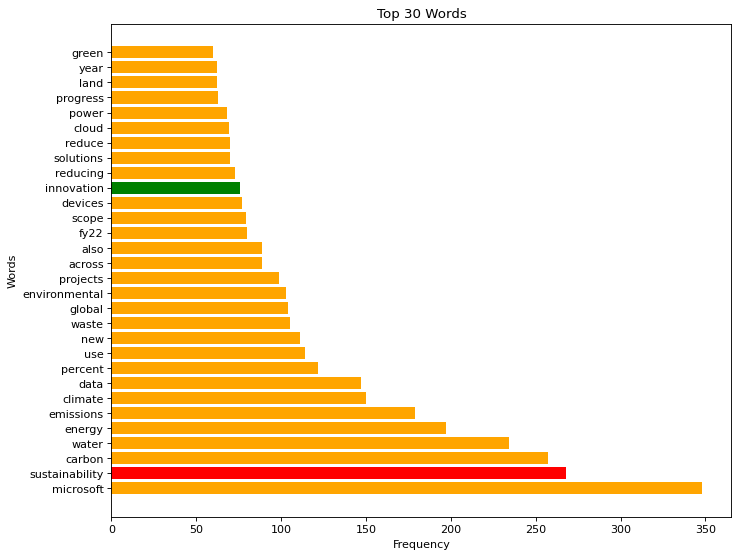

In [ ]:
import nltk
from nltk import FreqDist
import numpy as np
import matplotlib.pyplot as plt

my_dist = FreqDist(cleaned_text_Microsoft)

# Get the top 30 words and their frequencies
top_words = [word[0] for word in my_dist.most_common(30)]
word_frequencies = [word[1] for word in my_dist.most_common(30)]

# Plot the bar chart
plt.figure(figsize=(10, 8), dpi=80)
colors = ['red' if word == 'sustainability' else 'green' if word == 'innovation' else 'orange' for word in top_words]
plt.barh(top_words, word_frequencies, color=colors)
plt.title('Top 30 Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

I noticed there are some words that do not hold analytical values, so I exluded some words that are irrelevent to our analysis.

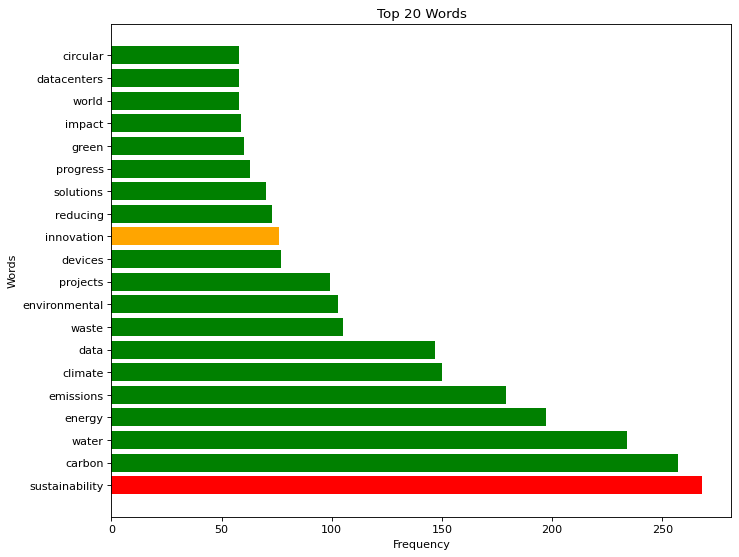

In [ ]:
import nltk
from nltk import FreqDist
import numpy as np
import matplotlib.pyplot as plt

my_dist = FreqDist(cleaned_text_Microsoft)
exclude_words = ['microsoft','organization','program','desgin','word','help','work','sustainable','progess','new','land','approach','power','reduce','scope','fy22','cloud','product', 'project','percent','use','global','device','also','across','year']
filtered_dist = {word: freq for word, freq in my_dist.items() if word not in exclude_words}

# Get the top 30 words and their frequencies
top_words = [word[0] for word in FreqDist(filtered_dist).most_common(20)]
word_frequencies = [word[1] for word in FreqDist(filtered_dist).most_common(20)]
colors = ['red' if word == 'sustainability' else 'orange' if word == 'innovation' else 'green' for word in top_words]

# Plot the bar chart
plt.figure(figsize=(10, 8), dpi=80)
plt.barh(top_words, word_frequencies, color=colors)
plt.title('Top 20 Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

As we can see from the above that innovation is not part of the most common 20 words, so I am using FreqDist function to understand the frequency of the word 'innovation'

In [ ]:
from nltk import FreqDist

my_dist = FreqDist(cleaned_text_Microsoft)


# Get the frequencies of the target words
word_frequencies_innovation = my_dist['innovation']
word_frequencies_sustainability = my_dist['sustainability']

print("Term frequency of 'innovation':", word_frequencies_innovation)
print("Term frequency of ' sustainability':", word_frequencies_sustainability)



Term frequency of 'innovation': 76
Term frequency of ' sustainability': 268


Here I generate a bar chart visualizing the term frequencies of 'sustainability' and 'innovation' using Seaborn, providing a quick visual comparison of the frequencies of these terms.

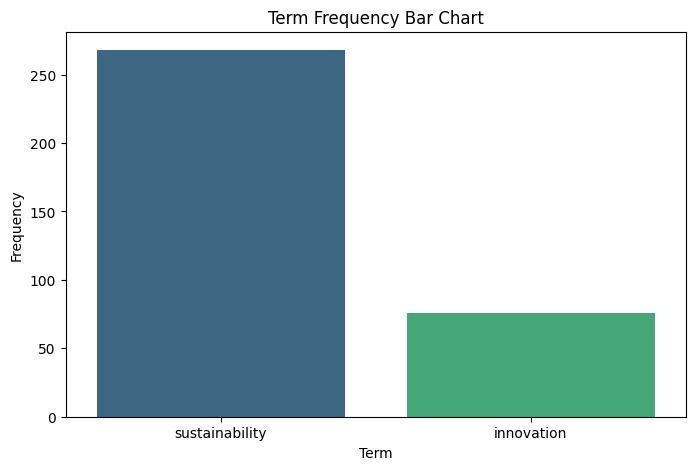

In [ ]:
import pandas as pd
import seaborn as sns

# Create a DataFrame for term frequency
term_freq_df = pd.DataFrame({'Term': ['sustainability', 'innovation'],
                             'Frequency': [268, 76]})

# Create a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Term', y='Frequency', data=term_freq_df, palette='viridis')
plt.title('Term Frequency Bar Chart')
plt.show()

### Corcordance Analysis

Then I used the concordance method to understand how "sustainability" and "innovation" are used in the cleaned_text by displaying the surrounding words. [Krisel,2023](https://github.com/rskrisel/intro_to_nltk/blob/main/Intro_NLTK_workshop.ipynb)

In [ ]:
import nltk
from nltk import Text

# Assuming 'cleaned_text' contains the cleaned text from the previous code
text_object_Microsoft= Text(cleaned_text_Microsoft)

# Find the concordance of 'sustainability'
print("Concordance for 'sustainability':")
text_object_Microsoft.concordance("sustainability",width=90)

# Find the concordance of 'innovation'
print("\nConcordance for 'innovation':")
text_object_Microsoft.concordance("innovation",width=90)


Concordance for 'sustainability':
Displaying 25 of 268 matches:
environmental sustainability report enabling sustainability compan
mental sustainability report enabling sustainability company customers worldcolor palette 
eword progress work report 9microsoft sustainability carbon approach reducing scope emissi
 footprint key trends next 50customer sustainability commitments progress microsoft cloud 
 commitments progress microsoft cloud sustainability green software sustainability devices
t cloud sustainability green software sustainability devices planetary computer ai good 63
s planetary computer ai good 63global sustainability commitments progress science research
rogress work report foreword enabling sustainability company customers world marked sixth 
obal community melanie nakagawa chief sustainability officer brad smith vice chair preside
oach addressing climate crisis starts sustainability business made bold set commitments ca
decades come launched microsoft cloud sustainabili

Observations about Sustainability:

Microsoft has released an Environmental Sustainability Report, emphasizing the company's commitments and progress in sustainability.
The report covers the company's work in reducing carbon footprint, green software, sustainable device plans, and more.
The company is driving sustainability globally, including advancing global sustainability initiatives through tools like the Microsoft Cloud Sustainability Management Tool.
Microsoft Cloud Sustainability is a comprehensive suite covering sustainability management tools that contribute to advancing global sustainability initiatives.

Observations about Innovation:

Microsoft is investing in and accelerating climate innovation, establishing the Climate Innovation Fund with billions of dollars to support innovative technology development.
The company is driving new climate technology through research, policy advocacy, and strategic partnerships.
Microsoft is committed to sharing progress, learning, and innovation methodologies, with a focus on larger
 and research investment.
The company is investing in innovative water technologies, recognizing the importance of innovation in addressing water challenges.

Overall Observations:
Sustainability and innovation are closely intertwined in Microsoft's strategy. The company is not only committed to advancing sustainability but also views innovation as a key component in addressing global climate issues. Initiatives like the Climate Innovation Fund and global sustainability efforts demonstrate Microsoft's integrated approach, where sustainability and innovation complement each other in the company's sustainable development strategy.

### Similar Word Analysis

Then let's now see which words appear in similar contexts as the word "sustainability" and 'innovation'.  [Krisel,2023](https://github.com/rskrisel/intro_to_nltk/blob/main/Intro_NLTK_workshop.ipynb)

In [ ]:
text_object_Microsoft.similar('sustainability')

green hardware environmental microsoft devices science new drive help
impacts reduction services renewable among materials demand justice
entire footprints opened


In [ ]:
text_object_Microsoft.similar('innovation')

impact change water action availability advancing improvements pledge
efficient local content


Sustainability: The words associated with 'sustainability' include "green," "hardware," "environmental," "renewable," and "footprints," suggesting a direct connection to environmental efforts and concrete sustainability measures. These words indicate a focus on tangible aspects of sustainability, such as eco-friendly products ("green hardware"), environmental impact ("environmental," "footprints"), and sustainable energy sources ("renewable").

Innovation: For 'innovation', the associated words are "impact," "change," "action," "advancing," "improvements," "pledge," "efficient," and "local content." These words reflect a proactive and aspirational stance on innovation, pointing to the desire to effect positive change ("impact," "change") and take concrete steps ("action") towards sustainability goals


### TF-IDF Anaylsis
Here I use TF-IDF to find out the top 10 words with the highest tf–idf for the text, but unfortunately I could not find relationship between 'sustainability' and 'innovation.  [Krisel,2023](https://github.com/rskrisel/tf-idf/blob/main/README.md)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have a list of cleaned texts

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the cleaned texts
tfidf_matrix = vectorizer.fit_transform(cleaned_text_Microsoft)

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Calculate the average TF-IDF score for each word across all texts
average_tfidf_scores = tfidf_matrix.mean(axis=0).A1

# Create a dictionary mapping words to their average TF-IDF scores
word_tfidf_dict = dict(zip(feature_names, average_tfidf_scores))

# Sort the dictionary by TF-IDF scores
sorted_word_tfidf = sorted(word_tfidf_dict.items(), key=lambda x: x[1], reverse=True)

# Print the most distinctive words
print("Most distinctive words:")
for word, tfidf_score in sorted_word_tfidf[:5]:
    print(f"{word}: {tfidf_score}")



### Report 4: The Sustainable Development Goals Report 2023

#### Extracting text from PDF file:

Here I ask ChatGPT 'How to conduct text analysis on a PDF file'.


In [ ]:
!pip install pymupdf

import fitz  # PyMuPDF

def pdf_to_text(pdf_path):
    text = ""
    with fitz.open(pdf_path) as pdf_doc:
        num_pages = pdf_doc.page_count
        for page_num in range(num_pages):
            page = pdf_doc[page_num]
            text += page.get_text()
    return text

pdf_path = "/content/The-Sustainable-Development-Goals-Report-2023.pdf"
extracted_text_UN = pdf_to_text(pdf_path)
print(extracted_text_UN)

### Text Cleaning

Then I am preparing the text for analysis by tokenizing, converting to lowercase, removing stopwords, and lemmatizing. The cleaned text is then stored in a file for further use. [Krisel,2023](https://github.com/rskrisel/intro_to_nltk/blob/main/Intro_NLTK_workshop.ipynb)

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

# Download necessary NLTK resources
nltk.download(['stopwords', 'punkt', 'wordnet'])

# Define stopwords and lemmatizer
stops = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    """
    Clean and lemmatize text.
    Converts words to lower case, removes stopwords and digits,
    and maps related terms to a unified representative term.
    """
    text_tokens = word_tokenize(text)
    text_lower = [t.lower() for t in text_tokens if t.isalnum() and not t.isdigit()]
    text_stops = [t for t in text_lower if t not in stops]

    unified_terms = {
        'sustainability': 'sustainability',
        'sustainable': 'sustainability',
        'innovation': 'innovation',
        'innovative': 'innovation',
        'innovate': 'innovation'
    }

    # Lemmatize without considering the part of speech
    text_clean = [unified_terms.get(lemmatizer.lemmatize(t), t) for t in text_stops]
    return text_clean

cleaned_text_UN = clean_text(extracted_text_UN)

# Store the cleaned text in a file
with open("cleaned_text_Mckinsey.txt", "w", encoding='utf-8') as file:
    file.write(" ".join(cleaned_text_UN))  # Join the cleaned text into a single string for writing to the file


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


### Term Frequency Analysis & Visualization

Here I used Term Frequency Method to display the top 10 most common words, then I use matplotlib to generate a horizontal bar chart that visualizes the frequency distribution of the top 20 words with the aim to gain insights into the most prevalent words in our cleaned_text document.

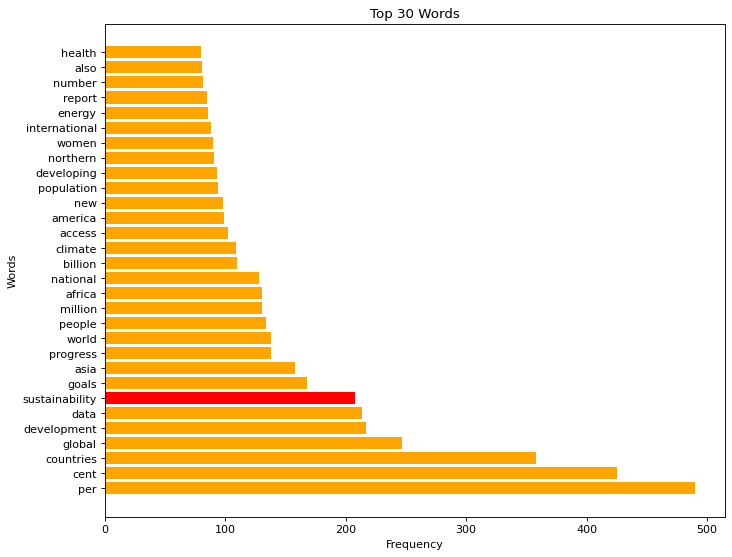

In [5]:
import nltk
from nltk import FreqDist
import numpy as np
import matplotlib.pyplot as plt

my_dist = FreqDist(cleaned_text_UN)

# Get the top 30 words and their frequencies
top_words = [word[0] for word in my_dist.most_common(30)]
word_frequencies = [word[1] for word in my_dist.most_common(30)]

# Plot the bar chart
plt.figure(figsize=(10, 8), dpi=80)
colors = ['red' if word == 'sustainability' else 'orange' for word in top_words]
plt.barh(top_words, word_frequencies, color=colors)
plt.title('Top 30 Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

I noticed there are some words that do not hold analytical values, so I exluded some words that are irrelevent to our analysis.

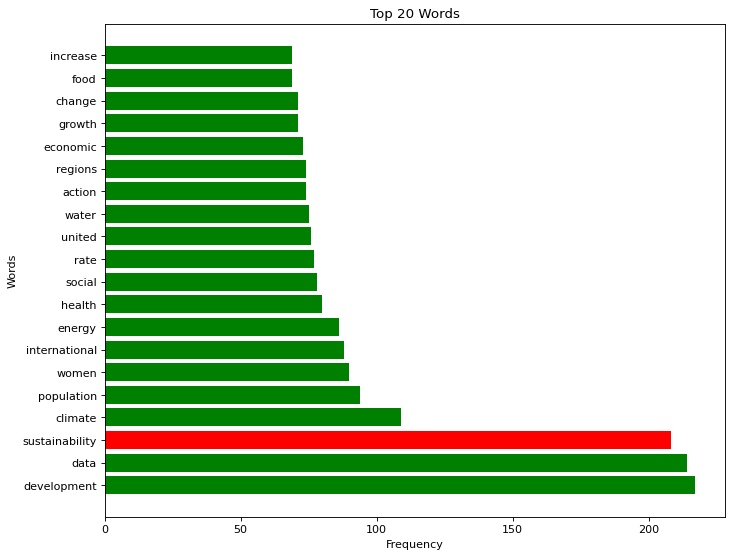

In [6]:
import nltk
from nltk import FreqDist
import numpy as np
import matplotlib.pyplot as plt

my_dist = FreqDist(cleaned_text_UN)
exclude_words = ['per', 'cent','countries','global','goals','asia','progress','world','people','million','africa','national','billion','new','america','access','developing', 'northern','report','number','also','nations','areas','since']
filtered_dist = {word: freq for word, freq in my_dist.items() if word not in exclude_words}

# Get the top 30 words and their frequencies
top_words = [word[0] for word in FreqDist(filtered_dist).most_common(20)]
word_frequencies = [word[1] for word in FreqDist(filtered_dist).most_common(20)]

# Plot the bar chart
plt.figure(figsize=(10, 8), dpi=80)
colors=['red' if word == 'sustainability' else 'green' for word in top_words]
plt.barh(top_words, word_frequencies, color=colors)
plt.title('Top 20 Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

As we can see from the above that innovation is not part of the most common 20 words, so I am using FreqDist function to understand the frequency of the word 'innovation'

In [7]:
from nltk import FreqDist

my_dist = FreqDist(cleaned_text_UN)

# Get the frequencies of the target words
word_frequencies_innovation = my_dist['innovation']
word_frequencies_sustainability = my_dist['sustainability']

print("Term frequency of 'innovation':", word_frequencies_innovation)
print("Term frequency of ' sustainability':", word_frequencies_sustainability)


Term frequency of 'innovation': 32
Term frequency of ' sustainability': 208


Here I generate a bar chart visualizing the term frequencies of 'sustainability' and 'innovation' using Seaborn, providing a quick visual comparison of the frequencies of these terms.

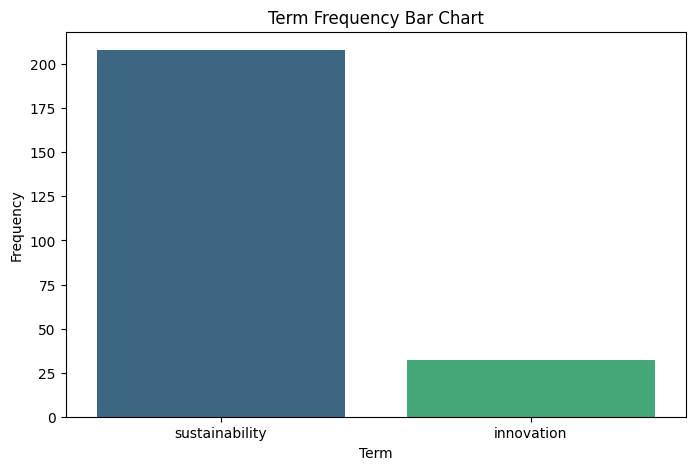

In [8]:
import pandas as pd
import seaborn as sns

# Create a DataFrame for term frequency
term_freq_df = pd.DataFrame({'Term': ['sustainability', 'innovation'],
                             'Frequency': [208, 32]})

# Create a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Term', y='Frequency', data=term_freq_df, palette='viridis')
plt.title('Term Frequency Bar Chart')
plt.show()

### Corcordance Analysis

Then I used the concordance method to understand how "sustainability" and "innovation" are used in the cleaned_text by displaying the surrounding words. [Krisel,2023](https://github.com/rskrisel/intro_to_nltk/blob/main/Intro_NLTK_workshop.ipynb)

In [9]:
import nltk
from nltk import Text

# Assuming 'cleaned_text' contains the cleaned text from the previous code
text_object_UN = Text(cleaned_text_UN)

# Find the concordance of 'sustainability'
print("Concordance for 'sustainability':")
text_object_UN.concordance("sustainability",width=90)

# Find the concordance of 'innovation'
print("\nConcordance for 'innovation':")
text_object_UN.concordance("innovation",width=90)


Concordance for 'sustainability':
Displaying 25 of 208 matches:
 sustainability development goals report special edit
ucture goal reduced inequalities goal sustainability cities communities goal responsible c
ple planet visual summary note reader sustainability development goals report special edit
ion towards rescue plan people planet sustainability development goals report foreword hal
aring brunt collective failure invest sustainability development goals sdgs many face huge
 developing countries special edition sustainability development goals report reminds us s
lign private sector governance models sustainability development objectives could spark si
s midpoint words truer ever us ensure sustainability development goals achieved full time 
ime li junhua economic social affairs sustainability development goals report early effort
evelopment goals report early efforts sustainability development goals adopted produced fa
rogress time sound alarm midpoint way sustainability developmen

Sustainability: The UN report emphasizes the importance of sustainable development goals (SDGs), highlighting efforts to address inequalities, create sustainable cities, and integrate sustainability into governance models. It notes the significant challenges and the need for increased investment in sustainability.

Innovation: The report discusses the role of innovation in achieving SDGs, including the use of data and technology. It highlights the need for innovative governance models and data-driven approaches to tackle global challenges.

Relationship Between Sustainability and Innovation: The UN report suggests a strong link between sustainability and innovation. It underscores the necessity of innovative solutions and strategies to achieve sustainability goals, particularly in the context of global challenges and development objectives.

In summary, the report illustrates that sustainability and innovation are interconnected, with innovation being crucial for advancing sustainability goals. The focus is on utilizing innovative approaches to address and fulfill sustainability commitments and objectives.

### Similar Word Analysis

Then let's now see which words appear in similar contexts as the word "sustainability" and 'innovation'. But in this context, since there is no similar word to 'innovation', I could not reach any conclusion.    [Krisel,2023](https://github.com/rskrisel/intro_to_nltk/blob/main/Intro_NLTK_workshop.ipynb)

In [10]:
text_object_UN.similar('sustainability')

goals growth finance official multilateral rights implementation
agriculture statistics enabling capital industrial research encourage
peacebuilders millennium


In [11]:
text_object_UN.similar('innovation')

### TF-IDF Anaylsis
Here I use TF-IDF to find out the top 10 words with the highest tf–idf for the text, but unfortunately I could not find relationship between 'sustainability' and 'innovation.  [Krisel,2023](https://github.com/rskrisel/tf-idf/blob/main/README.md)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have a list of cleaned texts

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the cleaned texts
tfidf_matrix = vectorizer.fit_transform(cleaned_text_UN)

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Calculate the average TF-IDF score for each word across all texts
average_tfidf_scores = tfidf_matrix.mean(axis=0).A1

# Create a dictionary mapping words to their average TF-IDF scores
word_tfidf_dict = dict(zip(feature_names, average_tfidf_scores))

# Sort the dictionary by TF-IDF scores
sorted_word_tfidf = sorted(word_tfidf_dict.items(), key=lambda x: x[1], reverse=True)

# Print the most distinctive words
print("Most distinctive words:")
for word, tfidf_score in sorted_word_tfidf[:5]:
    print(f"{word}: {tfidf_score}")

Most distinctive words:
cent: 0.016098484848484917
countries: 0.013560606060606113
global: 0.009356060606060632
development: 0.008219696969696988
data: 0.008106060606060624


### IV: Conclusion

In conclusion, my research based on 4 companies' reports revealed that sustainability may not have robust correlation between company sustainability and innovation efforts. But Innovation is likely seen as a necessary tool for achieving sustainability goals. While innovation is more aspirational, sustainability efforts are grounded in concrete actions and commitments that require innovative thinking. This demonstrates a relationship where sustainability challenges drive innovation, and innovative practices lead to more effective sustainability outcomes.
